# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе.

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import re

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [ ]:
df = pd.read_csv(
    "pj6_data.zip",
    encoding="ISO-8859-1",
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(df.shape))
df.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


Данные представляют собой набор из 541909 наблюдений и 8 признаков.

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print('Date interval {} to {}'.format(df['InvoiceDate'].dt.date.min(), df['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


Представленные данные охватывают период с 01.12.2010 по 09.12.2011, то есть примерно 1 год.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


Признаки InvoiceNo, StockCode, Description, CustomerID, Country имеют тип object.

Признаки Quantity и UnitPrice представлены в числовом формате float64 и int64.

Признак InvoiceDate преобразован в формат даты datetime64.

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.isnull().sum().sum()

136534

Данные имеют 136534 пропуска - 1454 в описании товара (признак Description) и 135080 в идентификаторах клиентов (признак CustomerID).

In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
len(df['Country'].unique())

38

В данных представлена информация о 38 странах, из которых совершались покупки.

In [ ]:
len(df['CustomerID'].unique())

4373

In [ ]:
df['CustomerID'].value_counts()

17841    7983
14911    5903
14096    5128
12748    4642
14606    2782
         ... 
15070       1
15753       1
17065       1
16881       1
16995       1
Name: CustomerID, Length: 4372, dtype: int64

В данных присутствует информация о 4372 уникальных клиентах. При этом наибольшее количество заказов (7983) сделано с аккаунта 17841, это скорее всего оптовый покупатель.

## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [ ]:
df.isnull().sum().sum()


136534

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Данные имеют 136534 пропуска - 1454 в описании товара (признак Description) и 135080 в идентификаторах клиентов (признак CustomerID).

In [ ]:
df.dropna(subset=['CustomerID'], inplace=True)
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

При удалении строк с незаполненными значениями CustomerID пропапали также все незаполненные значения Description. В данных больше нет пропусков.

#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [ ]:
df.duplicated().sum()

5225

In [ ]:
df.drop_duplicates(inplace=True)
df.shape[0]

401604

Количество дублирующихся записей - 5225.

После удаления дублирующих записей в наборе данных осталось 401604 записи.

#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [ ]:
temp = df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [ ]:
def get_quantity_canceled(df):
    """Функция для создания признака количества отменённых заказов.
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(df.shape[0]), index=df.index)
    negative_quantity = df[(df['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = df[(df['CustomerID'] == col['CustomerID']) &
                       (df['StockCode']  == col['StockCode']) &
                       (df['InvoiceDate'] < col['InvoiceDate']) &
                       (df['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0):
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled
        elif (df_test.shape[0] == 1):
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1):
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']:
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break
    return quantity_canceled

df['QuantityCanceled'] = get_quantity_canceled(df)

*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



In [ ]:
df['QuantityCanceled'].sum()

245266.0

In [ ]:
df_plus = df[df['Quantity'] > 0]
df_plus.shape[0]

392732

Общее количество отмененных транзакций 245266.

После очистки данных от отмененных транзакций в данных осталось 392732 записей.

#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [ ]:
df_plus['Special_transaction'] = df_plus['StockCode'].apply(lambda x: 1 if re.findall('^[a-zA-Z]+', x) else 0)
len(df_plus[df_plus['Special_transaction'] == 1]['StockCode'].unique())

6

In [ ]:
df_plus = df_plus[df_plus['Special_transaction'] == 0]
df_plus.shape[0]

391183

Всего выявлено 6 специализированных транзакций.

После их удаления в данных осталось 391183 записи.

#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [ ]:
df_plus[df_plus['UnitPrice'] == 0]['UnitPrice'].count()

33

In [ ]:
df_plus = df_plus[df_plus['UnitPrice'] != 0]
df_plus.shape[0]

391150

Выявлено 33 транзакции с нулевой ценой.

После их удаления в данных осталось 391150 записей.

#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:

 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [ ]:
df_plus['TotalPrice'] = df_plus['UnitPrice'] * (df_plus['Quantity'] - df_plus['QuantityCanceled'])
df_plus.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,Special_transaction,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0,0,22.00



После завершения предобработки сохраним результат очищения данных в отдельный файл, чтобы впоследствии не приходилось повторять все действия.


In [ ]:
df_cleaned = df_plus.copy()
df_cleaned.to_csv('df_cleaned.csv')

NameError: ignored

### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)?

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



#### 2.2.1 Распределение клиентов и выручки по странам

In [225]:
df_cleaned = pd.read_csv('df_cleaned.zip')

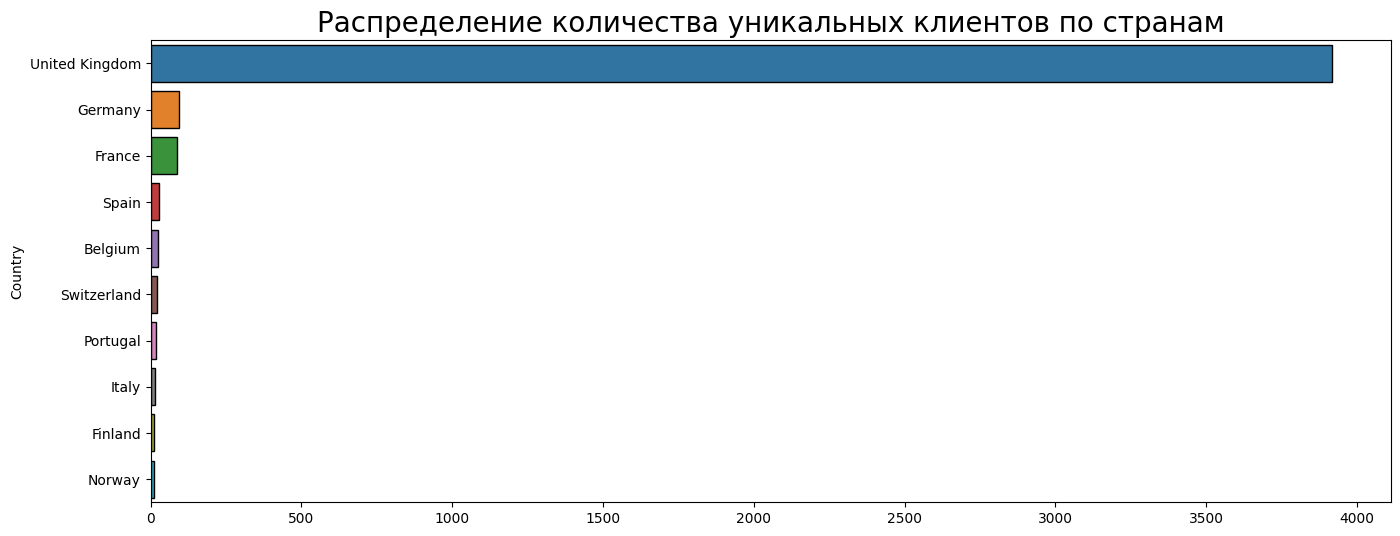

In [226]:
countries = df_cleaned.drop_duplicates(subset='CustomerID').groupby(
    'Country')['CustomerID'].count().sort_values(ascending=False)[:10]
fig, axes = plt.subplots(figsize=(16, 6))
sns.barplot(x=countries.values, y=countries.index)
axes.set_title('Распределение количества уникальных клиентов по странам', fontsize=20);

In [227]:
countries

Country
United Kingdom    3916
Germany             94
France              87
Spain               28
Belgium             24
Switzerland         20
Portugal            19
Italy               14
Finland             12
Norway              10
Name: CustomerID, dtype: int64

Text(0.5, 1.0, 'Распределение заказов по странам')

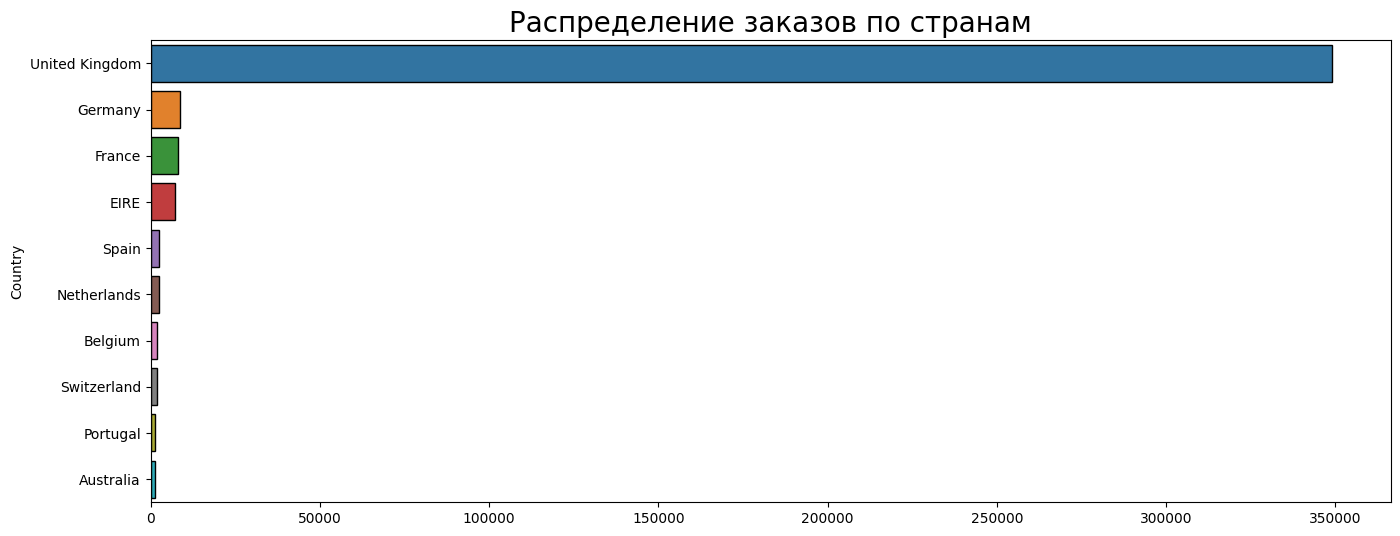

In [228]:
orders = df_cleaned.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)[:10]

fig, axes = plt.subplots(figsize=(16, 6))
sns.barplot(x=orders.values, y=orders.index)
axes.set_title('Распределение заказов по странам', fontsize=20)

In [229]:
orders

Country
United Kingdom    348872
Germany             8643
France              8019
EIRE                7126
Spain               2417
Netherlands         2322
Belgium             1935
Switzerland         1810
Portugal            1416
Australia           1180
Name: InvoiceNo, dtype: int64

Text(0.5, 1.0, 'Распределение выручки по странам')

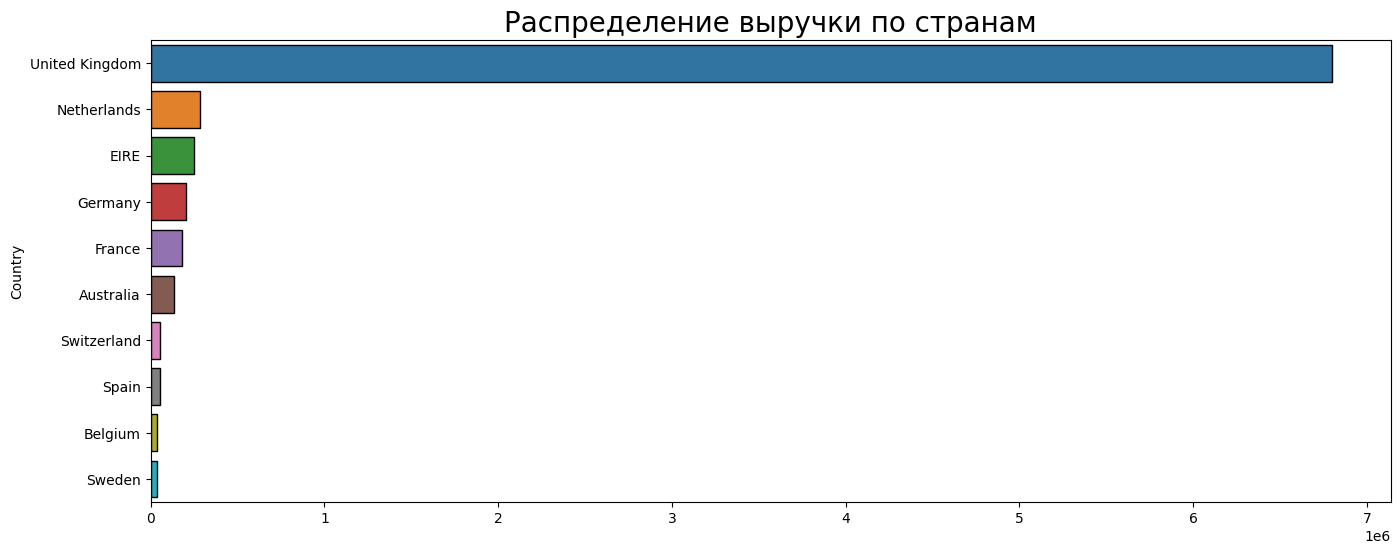

In [230]:
revenue = df_cleaned.groupby('Country')['TotalPrice'].sum().sort_values(
    ascending=False)[:10]

fig, axes = plt.subplots(figsize=(16, 6))
sns.barplot(x=revenue.values, y=revenue.index)
axes.set_title('Распределение выручки по странам', fontsize=20)

In [231]:
revenue

Country
United Kingdom    6797691.44
Netherlands        283443.54
EIRE               247074.57
Germany            201520.71
France             181529.63
Australia          136950.25
Switzerland         51863.75
Spain               51764.90
Belgium             36673.04
Sweden              36362.91
Name: TotalPrice, dtype: float64

In [232]:
df_cleaned['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

Вывод:

Наиболее активно делают заказы клиенты из Великобритании - 3916 клиентов совершили 348872 заказов и соответственно принесли 6797691.44 фунта прибыли.

Всего же из данного магазина делают покупки клиенты из 35 стран, некоторые клиенты указали вместо страны Европейский союз, также есть клиенты, которые не указали свою страну, но их количество не велико.

#### 2.2.2 Распределение выручки по месяцам

In [233]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['Day_of_week'] = df_cleaned['InvoiceDate'].dt.day_of_week
df_cleaned['Hour'] = df_cleaned['InvoiceDate'].dt.hour
df_cleaned.head(3)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,Special_transaction,TotalPrice,Month,Day_of_week,Hour
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,0,15.30,12,2,8
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,0,20.34,12,2,8
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0,0,22.00,12,2,8


In [234]:
df_month_country = df_cleaned.pivot_table(
    values='TotalPrice',
    index='Month',
    columns='Country',
    fill_value=0,
    aggfunc='sum'
)

In [235]:
df_month_country

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
Month,,,,,,,,,,,,,,,,,,,,,
1,9017.71,0.00,0.0,1068.95,0.0,0.00,645.08,547.50,0.00,0.00,...,0.00,0.00,2053.07,9591.89,3106.32,3929.23,0.00,0.00,335297.02,0.00
2,14141.27,438.36,0.0,1906.32,0.0,0.00,1784.71,3962.75,491.75,363.22,...,0.00,131.17,0.00,1660.45,469.50,2337.17,0.00,889.24,349363.11,0.00
3,17103.29,1286.42,0.0,2947.38,0.0,140.54,3509.33,938.39,0.00,3978.99,...,0.00,0.00,0.00,4775.15,4680.58,1590.23,0.00,0.00,454801.96,0.00
4,421.60,584.78,0.0,1788.48,1143.6,0.00,243.00,0.00,0.00,0.00,...,0.00,0.00,2118.74,1645.65,640.60,1479.49,383.95,0.00,400021.11,299.10
5,13605.51,1049.43,548.4,2481.00,0.0,534.24,903.79,0.00,0.00,479.70,...,0.00,0.00,0.00,2697.60,2641.98,3428.06,0.00,0.00,530587.22,852.68
6,25187.77,0.00,0.0,3845.22,0.0,1171.46,2060.03,1109.32,0.00,2928.60,...,0.00,0.00,0.00,2707.26,676.00,7504.11,0.00,0.00,471722.19,185.78
7,4767.57,1111.95,0.0,2205.57,0.0,1217.64,0.00,0.00,0.00,358.24,...,0.00,0.00,3949.32,7116.77,6682.19,3238.90,0.00,0.00,473428.92,792.18
8,22315.20,1436.08,0.0,3111.92,0.0,51.56,4882.63,0.00,0.00,195.15,...,0.00,0.00,0.00,2877.91,1150.36,4870.78,0.00,0.00,478925.72,531.03
9,5031.73,0.00,0.0,3779.02,0.0,0.00,1321.65,196.35,0.00,4510.16,...,0.00,0.00,0.00,4428.49,4517.21,7488.71,0.00,975.54,780839.07,0.00


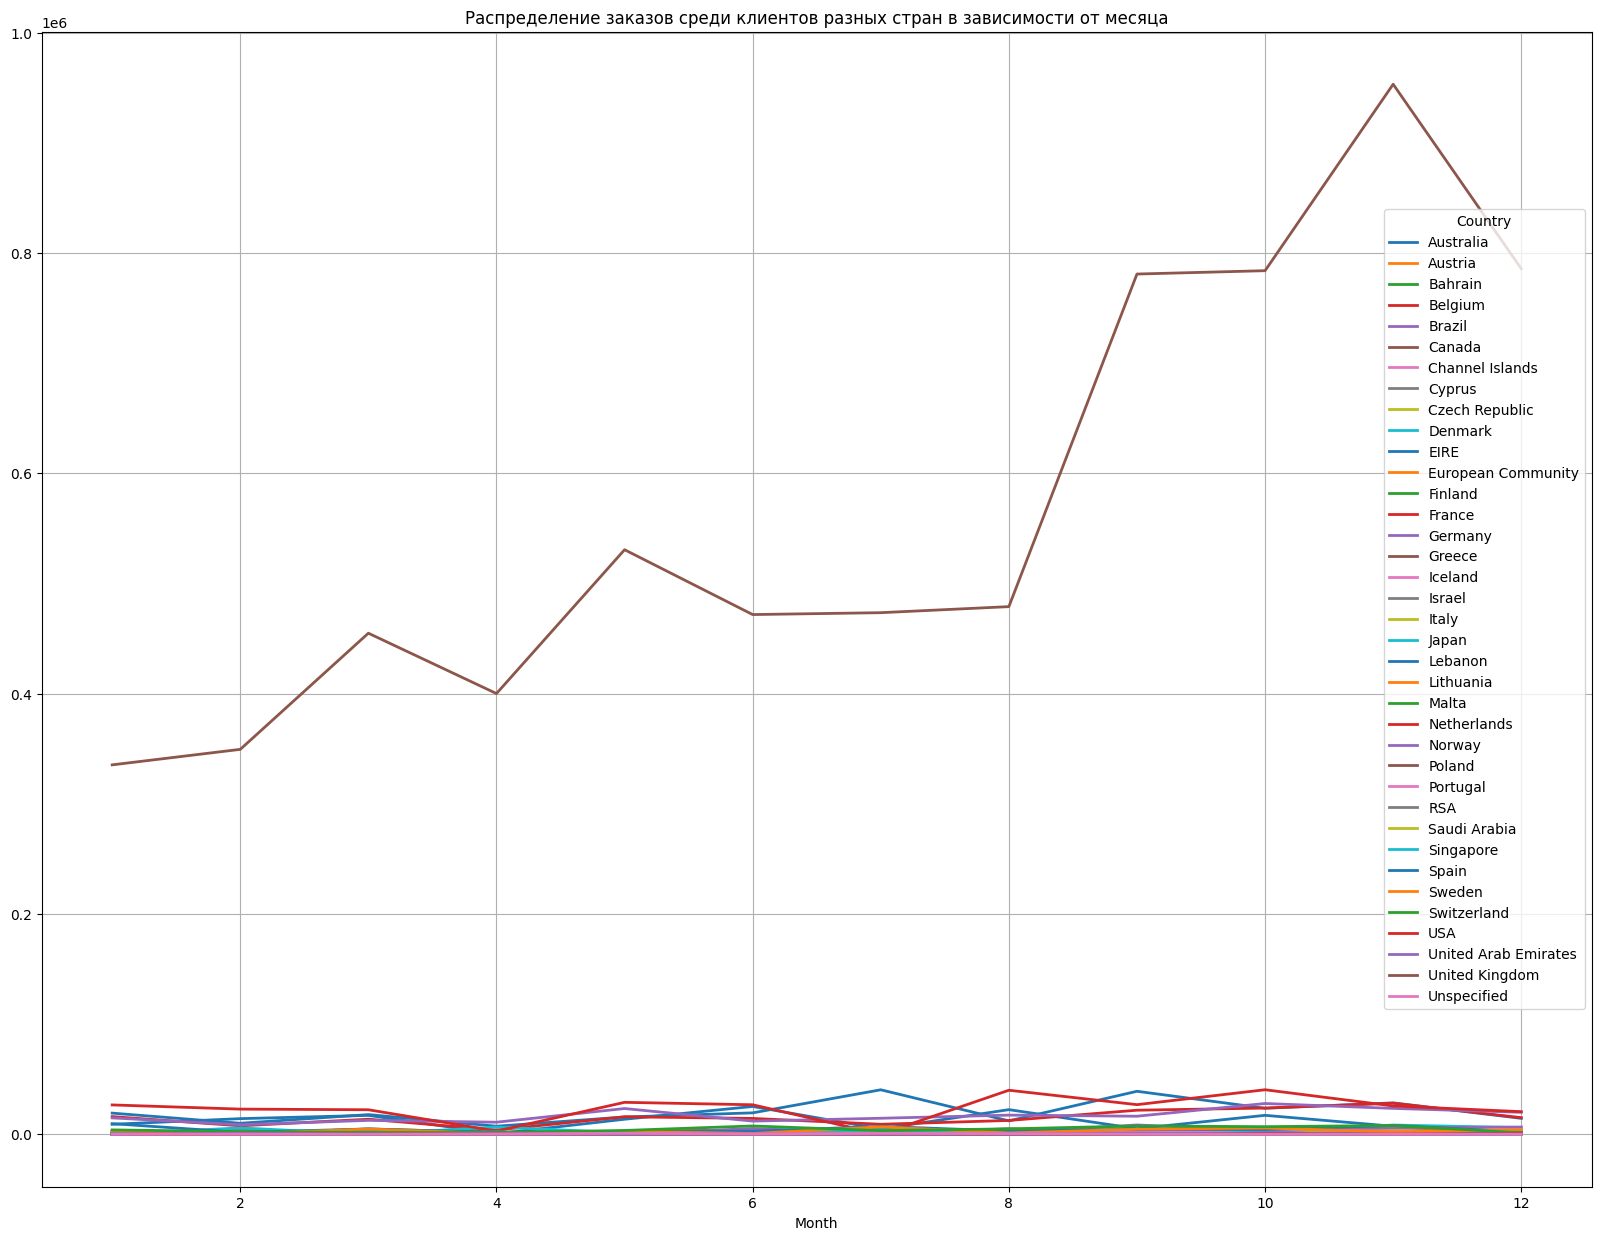

In [236]:
df_month_country.plot(
    kind='line',
    figsize=(20, 15),
    title='Распределение заказов среди клиентов разных стран в зависимости от месяца',
    grid = True,
    lw=2
);

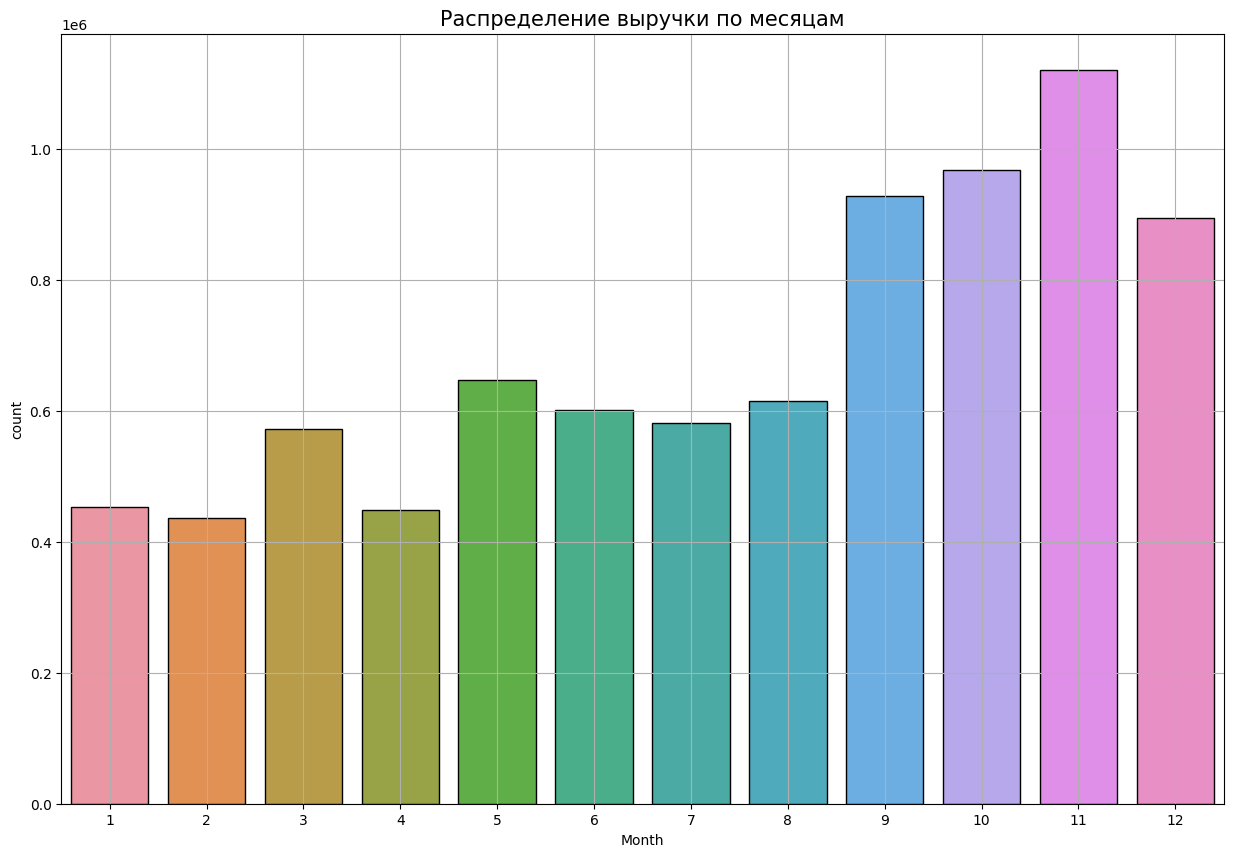

In [237]:
df_month_revenue = df_cleaned.groupby('Month')['TotalPrice'].sum().sort_values()
df_month_revenue = pd.DataFrame({'Month': df_month_revenue.index, 'count': df_month_revenue.values})

fig, axes = plt.subplots(figsize=(15, 10))
barplot = sns.barplot(
    data=df_month_revenue,
    x='Month',
    y='count',
    orient='v',
    ci=None)

barplot.set_title('Распределение выручки по месяцам', fontsize=15);
barplot.grid()

Из представленных графиков видно, что больше всего заказов клиенты делают ближе к концу года, что скорее всего связано с покупкой подарков на Рождество и Новый год. Наибольшую сезонную выручку приносят клиенты из Великобритании, Нидерландов и Ирландии.

#### 2.2.2 Распределение выручки по дням недели

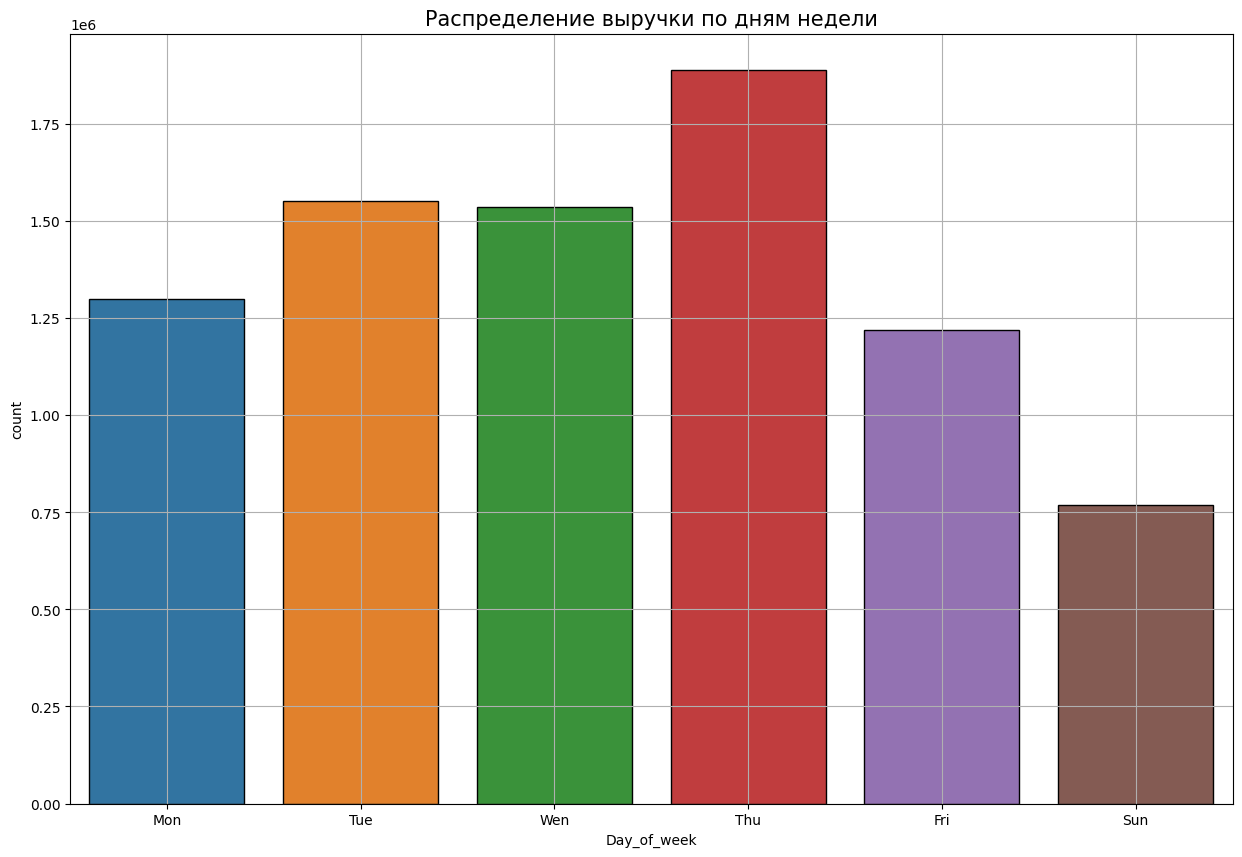

In [238]:
df_day_revenue = df_cleaned.groupby('Day_of_week')['TotalPrice'].sum().sort_values()
df_day_revenue = pd.DataFrame({'Day_of_week': df_day_revenue.index, 'count': df_day_revenue.values})

fig, axes = plt.subplots(figsize=(15, 10))
barplot = sns.barplot(
    data=df_day_revenue,
    x='Day_of_week',
    y='count',
    orient='v',
    ci=None)

barplot.set_title('Распределение выручки по дням недели', fontsize=15);
barplot.set_xticklabels(['Mon', 'Tue', 'Wen', 'Thu', 'Fri', 'Sun']);
barplot.grid()

Наибольшее количество выручки от заказов поступает в четверг, ниаменьшее - в воскресенье. В субботу выручки от заказов нет, вероятно в этот день в магазине выходной.

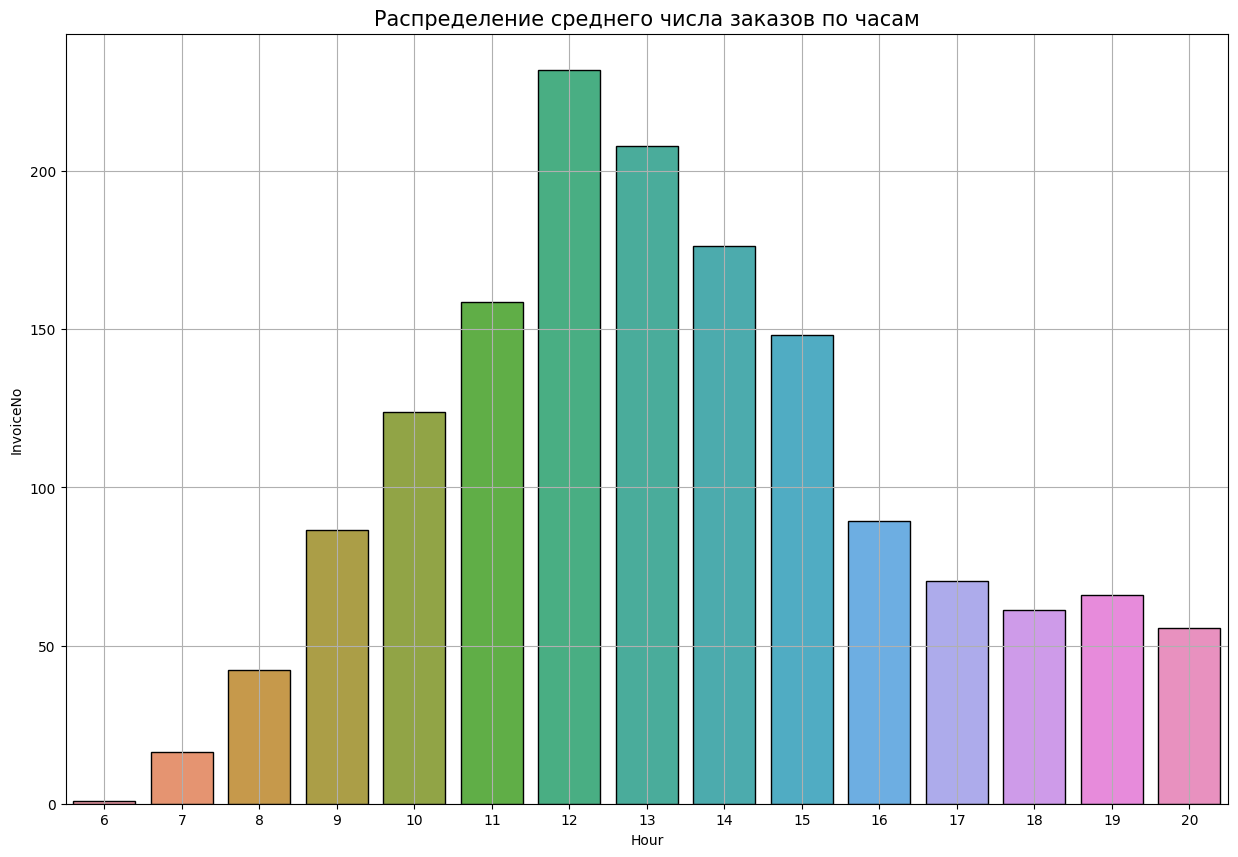

In [239]:
df_cleaned['Date'] = df_cleaned['InvoiceDate'].dt.date
df_date_hour = df_cleaned.groupby(['Date', 'Hour'], as_index=False)['InvoiceNo'].count()
df_hour_mean = df_date_hour.groupby(['Hour'], as_index=False)['InvoiceNo'].mean()

fig, axes = plt.subplots(figsize=(15, 10))
barplot = sns.barplot(
    data=df_hour_mean,
    x='Hour',
    y='InvoiceNo',
    orient='v',
    ci=None)

barplot.set_title('Распределение среднего числа заказов по часам', fontsize=15);
barplot.grid()

В среднем наибольшее количество заказов совершается днём в районе 12-14 часов.

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM.

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов.

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [240]:
df_recency = df_cleaned.groupby('CustomerID')['InvoiceDate'].max().reset_index()
df_recency['Recency'] = pd.to_datetime('2011-12-10') - df_recency['InvoiceDate']
df_recency['Recency'] = df_recency['Recency'].dt.days
df_recency.drop(columns='InvoiceDate')

,CustomerID,Recency
0,12346,325
1,12347,2
2,12348,75
3,12349,18
4,12350,310
...,...,...
4329,18280,277
4330,18281,180
4331,18282,7
4332,18283,3


In [241]:
df_frequency = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
df_frequency.rename(columns={"InvoiceNo": "Frequency"}, inplace=True)

df_monetary = df_cleaned.groupby('CustomerID')['TotalPrice'].sum().reset_index()
df_monetary.rename(columns={"TotalPrice": "Monetary"}, inplace=True)

rfm_table = df_recency.merge(df_frequency, on='CustomerID', how='inner')
rfm_table = rfm_table.merge(df_monetary, on='CustomerID', how='inner')
rfm_table.drop(columns='InvoiceDate', inplace=True)
rfm_table

,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,0.00
1,12347,2,7,4310.00
2,12348,75,4,1437.24
3,12349,18,1,1457.55
4,12350,310,1,294.40
...,...,...,...,...
4329,18280,277,1,180.60
4330,18281,180,1,80.82
4331,18282,7,2,176.60
4332,18283,3,16,2039.58


После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

In [242]:
rfm_table = rfm_table.set_index('CustomerID')

In [243]:
boxes = [px.box(rfm_table, x=column) for column in rfm_table.columns]

fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [244]:
frequency_quantile_95 = np.percentile(rfm_table['Frequency'], 95)
monetary_quantile_95 = np.percentile(rfm_table['Monetary'], 95)

rfm_table_cleaned = rfm_table[~((rfm_table['Frequency'] > frequency_quantile_95) | (rfm_table['Monetary'] > monetary_quantile_95))]
rfm_table_cleaned

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,0.00
12347,2,7,4310.00
12348,75,4,1437.24
12349,18,1,1457.55
12350,310,1,294.40
...,...,...,...
18278,73,1,173.90
18280,277,1,180.60
18281,180,1,80.82


После удаления выбросов в таблице осталось 4044 записи вместо исходных 4334.

In [245]:
boxes = [px.box(rfm_table_cleaned, x=column) for column in rfm_table_cleaned.columns]

fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=(
        "Recency", "Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_2.html')
fig.show()

## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга).

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


In [246]:
from sklearn import preprocessing, decomposition, cluster, metrics, mixture
from sklearn.pipeline import Pipeline

In [247]:
pipeline = Pipeline([('scaler', preprocessing.StandardScaler()), ('pca', decomposition.PCA(n_components=2))])
pipeline.fit(rfm_table_cleaned)
rfm_table_processed = pipeline.transform(rfm_table_cleaned)

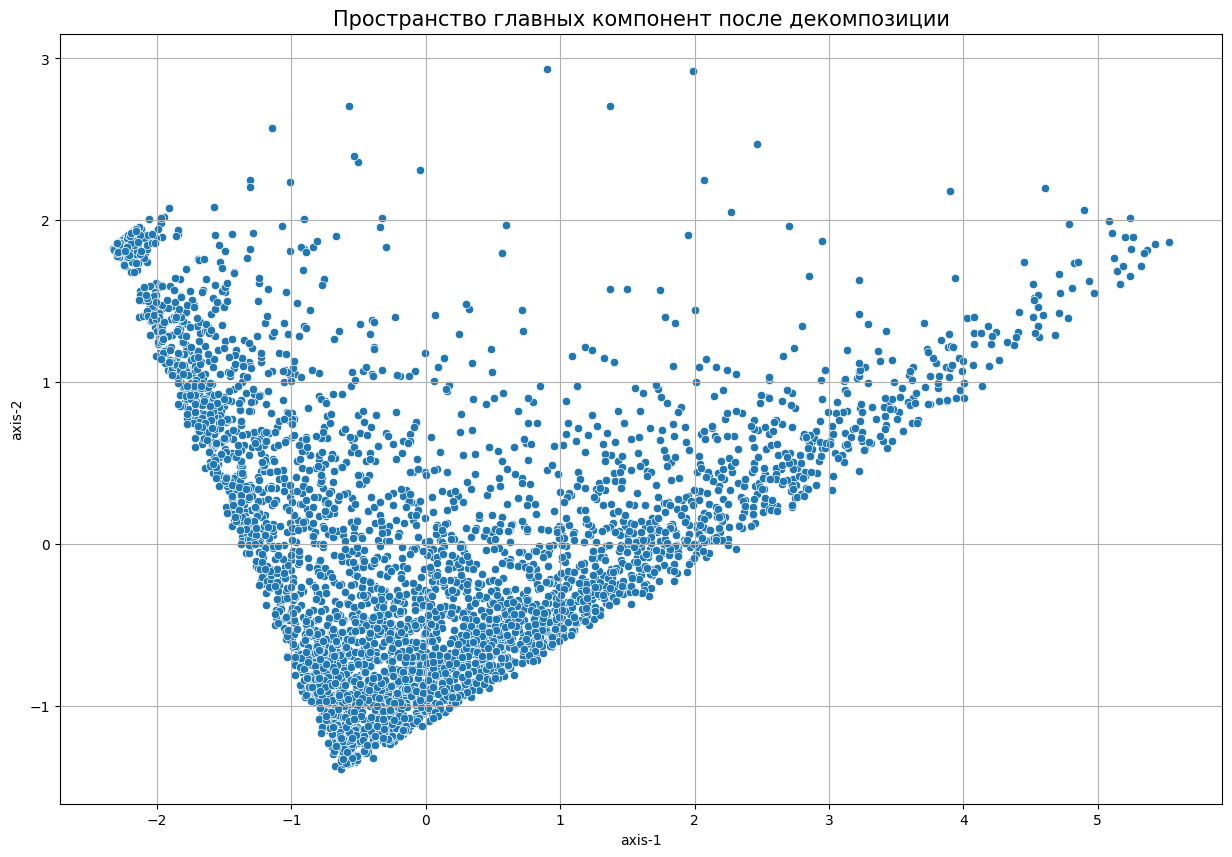

In [248]:
rfm_table_processed = pd.DataFrame(rfm_table_processed, columns = ['axis-1', 'axis-2'])

fig, axes = plt.subplots(figsize=(15, 10))
ax = sns.scatterplot(data=rfm_table_processed, x='axis-1', y='axis-2')

ax.set_title('Пространство главных компонент после декомпозиции', fontsize=15);
ax.grid()

Воспользуемся методом кластеризации k-means и определим оптимальное количество кластеров с помощью коэффициента силуэта.

Максимальное значение коэффициента силуэта: 0.524
Оптимальное количество кластеров: 3


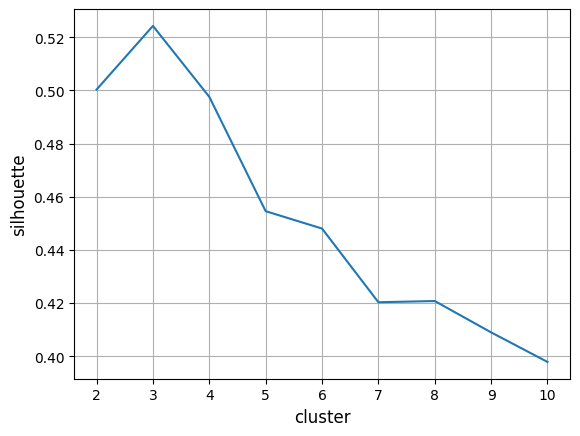

In [249]:
from sklearn.metrics import silhouette_score

def get_silhouette(n_clusters, data):
    kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    silhouette = metrics.silhouette_score(data, kmeans.labels_)
    return silhouette

silhouette_list = []
for n_clustes in range(2, 11):
        silhouette_list.append(get_silhouette(n_clustes, rfm_table_processed))

plt.plot([i for i in range(2, 11)], silhouette_list)
plt.xlabel('cluster', fontsize=12)
plt.ylabel('silhouette', fontsize=12)
plt.grid()
print(f'Максимальное значение коэффициента силуэта: {np.max(silhouette_list):.3f}')
print(f'Оптимальное количество кластеров: {silhouette_list.index(np.max(silhouette_list)) + 2}')

Далее воспользуемся EM-алгоритмом кластеризации и определим оптимальное количество кластеров с помощью коэффициента силуэта.

Максимальное значение коэффициента силуэта: 0.436
Оптимальное количество кластеров: 3


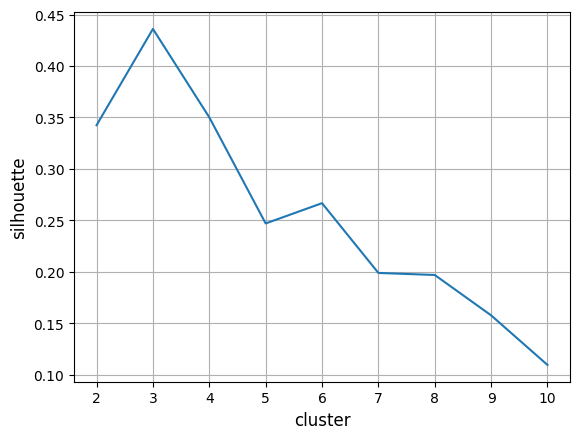

In [250]:
def get_silhouette(n_components, data):
    em_model = mixture.GaussianMixture(n_components=n_components, random_state=42)
    em_model.fit(data)
    labels = em_model.predict(data)
    silhouette = metrics.silhouette_score(data, labels)
    return silhouette

silhouette_list = []
for n_components in range(2, 11):
        silhouette_list.append(get_silhouette(n_components, rfm_table_processed))

plt.plot([i for i in range(2, 11)], silhouette_list)
plt.xlabel('cluster', fontsize=12)
plt.ylabel('silhouette', fontsize=12)
plt.grid()
print(f'Максимальное значение коэффициента силуэта: {np.max(silhouette_list):.3f}')
print(f'Оптимальное количество кластеров: {silhouette_list.index(np.max(silhouette_list)) + 2}')

Реализуем алгоритм иерархической кластеризации и определим оптимальное количество кластеров с помощью коэффициента силуэта.

0.5
Максимальное значение коэффициента силуэта: 0.497
Оптимальное количество кластеров: 3


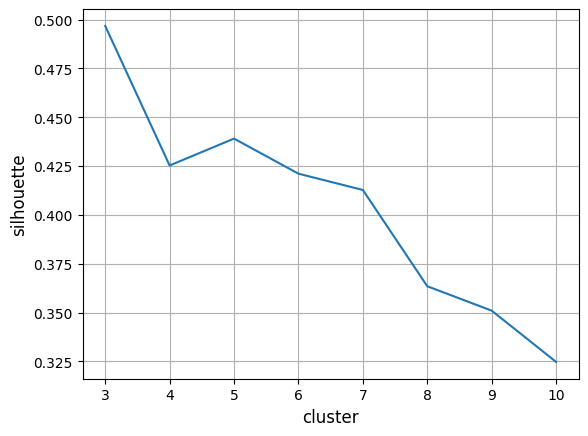

In [251]:
def get_silhouette(n_clusters, data):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    agg_clustering.fit(data)
    silhouette = metrics.silhouette_score(data, agg_clustering.labels_)
    return silhouette

silhouette_list = []
for n_clusters in range(3, 11):
        silhouette_list.append(get_silhouette(n_clusters, rfm_table_processed))

plt.plot([i for i in range(3, 11)], silhouette_list)
plt.xlabel('cluster', fontsize=12)
plt.ylabel('silhouette', fontsize=12)
print(np.round(np.max(silhouette_list),2))
plt.grid()

print(f'Максимальное значение коэффициента силуэта: {np.max(silhouette_list):.3f}')
print(f'Оптимальное количество кластеров: {silhouette_list.index(np.max(silhouette_list)) + 3}')

В итоге после использования трёх методов кластеризации (K-means, EM-алгоритм, метод иерархической агломеративной кластеризации) наибольшее значение коэффициента силуэта получено при использовании алгоритма K-means (0.524). Значит кластеризацию данных будем производить при помощи алгоритма K-means.

In [252]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(rfm_table_processed)
rfm_table_processed.loc[:, 'Label'] = kmeans.labels_
rfm_table_processed['Label'].value_counts()

1    2267
2    1000
0     777
Name: Label, dtype: int64

Text(0.5, 1.0, 'Визуализация разбиения данных на кластеры')

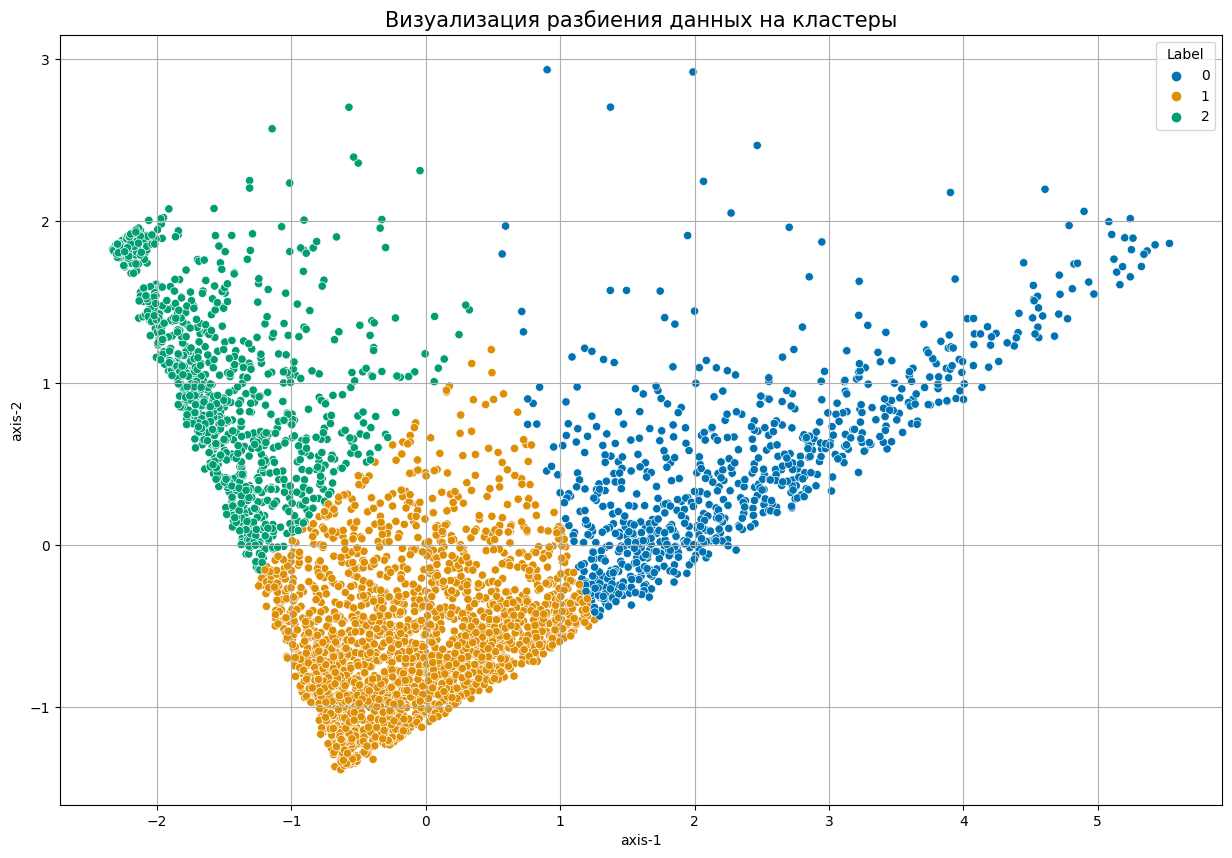

In [253]:
fig = plt.figure(figsize=(15, 10))
ax = sns.scatterplot(
    data=rfm_table_processed,
    x='axis-1',
    y='axis-2',
    hue='Label',
    palette='colorblind'
)
ax.grid()
ax.set_title('Визуализация разбиения данных на кластеры', fontsize=15)

### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

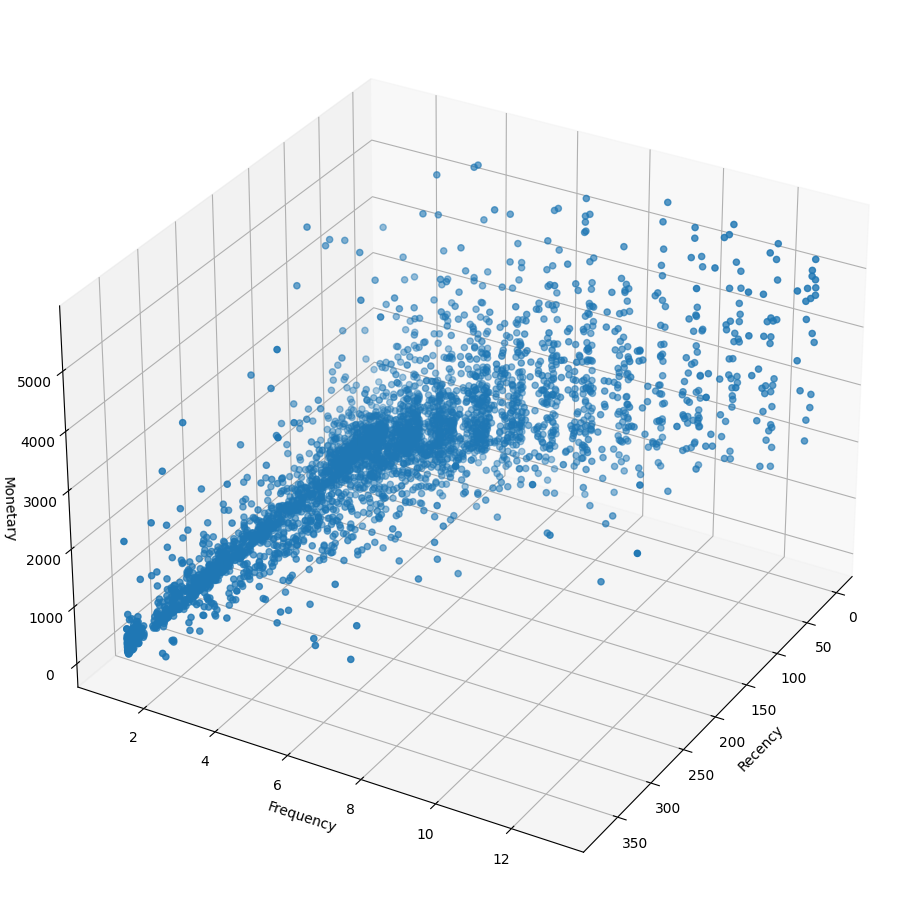

In [254]:
fig = plt.figure(figsize=(9,9))
ax = Axes3D(fig)
# добавим дополнительную ось в объект картинки
fig.add_axes(ax)
ax.azim = 30
ax.elev = 30

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(
    rfm_table_cleaned['Recency'].to_list(),
    rfm_table_cleaned['Frequency'].to_list(),
    rfm_table_cleaned['Monetary'].to_list()
)
# добавим оси
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary');

По данному графику видно, что можно выделить примерно 3 группы покупателей:

1 группа покупает много и часто (признак Monetary высокий, признак Frequency высокий, признак Recency равен 0);

2 группа покупает время от времени (признак Monetary средний, признак Frequency невысокий, признак Recency средний);

3 группа покупает мало или практически не покупает (признак Monetary низкий, признак Frequency невысокий, признак Recency высокий).

Однако визуализация кластеров на представленном графике не информативна.

#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник.

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [279]:
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

In [256]:
rfm_table_cleaned.loc[:, 'KMeans_label'] = kmeans.labels_
rfm_table_cleaned

,Recency,Frequency,Monetary,KMeans_label
CustomerID,,,,
12346,325,1,0.00,2
12347,2,7,4310.00,0
12348,75,4,1437.24,1
12349,18,1,1457.55,1
12350,310,1,294.40,2
...,...,...,...,...
18278,73,1,173.90,1
18280,277,1,180.60,2
18281,180,1,80.82,2


In [277]:
rfm_table_cleaned_grouped = rfm_table_cleaned.groupby('KMeans_label').mean()
rfm_table_cleaned_grouped

,Recency,Frequency,Monetary
KMeans_label,,,
0,31.924067,7.065637,2656.277439
1,51.186590,2.327746,659.624654
2,253.386000,1.405000,386.702470


In [278]:
plot_cluster_profile(rfm_table_cleaned_grouped, 3)

Соотнеся данные меток при разбиении на кластеры и усреднённые значения по давности, частоте и стоимости покупок видим, что на полярной виаграмме кластер 0 соответствует лояльным клитентам, которые часто совершают много покупок. Кластер 1 соответствует дрейфующим клиентам, которые делают заказы время от времени. Кластер 2 соответствует "спящим" клиентам, которые не далают заказы долгое время.

## 5. Выводы

В ходе работы проанализированы и обработаны данные о покупках в интернет магазине подарков. Выявлено, что самыми частыми заказчиками являются жители Великобритании. Чаще всего делаются заказы в интервале от 11 до 14 часов и в четверг. Пик заказов приходится на октябрь и ноябрь когда покупаются подарки на хэллуин, Рождество и Новый год.

Была проведена кастеризация 3 способами и при помощи определения коэффициента силуэта был выбран оптимальный алгоритм K-means, который разделил данные на 3 кластера.

Соединив данные по кластеризации и усредненные значения давности, частоты и стоимости покупок была получена полярная диаграмма показывающая типы потребительской активности клиентов. Была выделена группа акивных лояльных клиентов, группа коллеблющихся клиентов, которые совершают покупки время от времени, и группа спящих или потерянных клиентов, которые давно не совершали покупок.

Таким образом маркетологам для можно будет разработать опреденную стратегию для каждой группы, чтобы привлечь обратно потерянных клиентов и добавить интереса к покупкам для постоянных клиентов.